In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
from torsionfit import utils
#import seaborn as sbn
import numpy as np

In [2]:
db = sqlite_plus.load('butane_all_n5_100000.db')

In [4]:
from torsionfit import plots


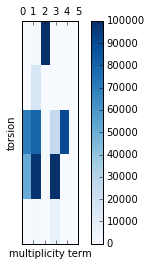

In [13]:
multiplicities = tuple(range(1, 7))
mult_bitstring = []
for key in db.getstate()['stochastics']:
    key_split = key.split('_')
    if key_split[-1] == 'bitstring':
        mult_bitstring.append(key)

histogram = np.zeros((len(mult_bitstring), 100000, 6))

for m, torsion in enumerate(mult_bitstring):
    for i, j in enumerate(db.trace('%s' % torsion)[:]):
        for k, l in enumerate(multiplicities):
            if 2**(l-1) & int(j):
                histogram[m][i][k] = 1

plt.matshow(histogram.sum(1), cmap='Blues',  extent=[0, 5, 0, 20]), plt.colorbar()
plt.yticks([])
plt.xlabel('multiplicity term')
plt.ylabel('torsion')


In [28]:
torsions

['HGA2_CG321_CG321_HGA2_multiplicity_bitstring',
 'CG331_CG321_CG321_CG331_multiplicity_bitstring',
 'HGA3_CG331_CG321_CG321_multiplicity_bitstring',
 'HGA3_CG331_CG321_HGA2_multiplicity_bitstring',
 'CG331_CG321_CG321_HGA2_multiplicity_bitstring']

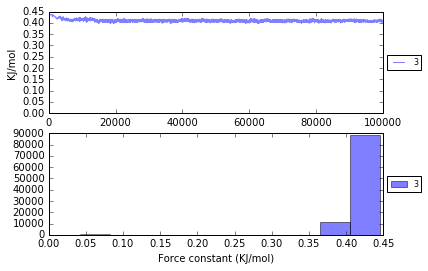

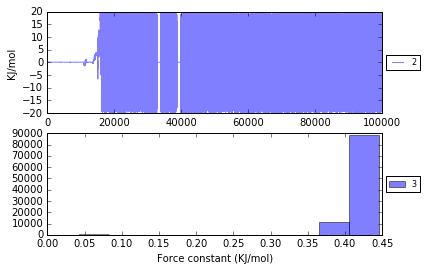

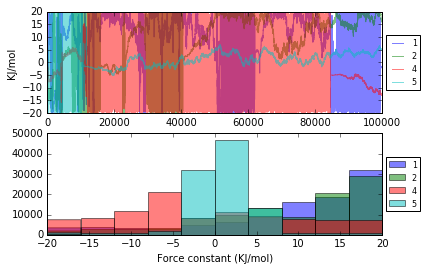

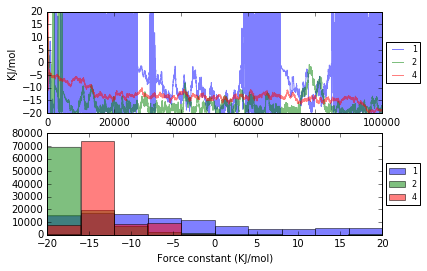

In [38]:
alpha=0.5
multiplicities = ['1', '2', '3', '4', '5']
colors = ['red', 'orange', 'gold', 'green', 'blue', 'violet']
with PdfPages('trace_hist_all.pdf') as pdf:
    
    plt.subplot(2, 1, 1)
    k_3 = 'HGA2_CG321_CG321_HGA2_3_K'
    plt.plot(getattr(db, k_3)[:], label='3', alpha=alpha)
    plt.ylabel('KJ/mol')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.subplot(2, 1, 2)
    plt.hist(getattr(db, k_3)[:], label='3', alpha=alpha)
    plt.xlabel('Force constant (KJ/mol)')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    pdf.savefig()
    plt.show()
    plt.close()
    
    plt.subplot(2, 1, 1)
    k_2 = 'CG331_CG321_CG321_CG331_2_K'
    plt.plot(getattr(db, k_2)[:], label='2', alpha=alpha)
    plt.ylabel('KJ/mol')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.subplot(2, 1, 2)
    plt.hist(getattr(db, k_3)[:], label='3', alpha=alpha)
    plt.xlabel('Force constant (KJ/mol)')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    pdf.savefig()
    plt.show()
    plt.close()
    
    plt.subplot(2, 1, 1)
    k_1 = 'HGA3_CG331_CG321_CG321_1_K'
    k_2 = 'HGA3_CG331_CG321_CG321_2_K'
    k_4 = 'HGA3_CG331_CG321_CG321_4_K'
    k_5 = 'HGA3_CG331_CG321_CG321_5_K'

    plt.plot(getattr(db, k_1)[:], label='1', alpha=alpha)
    plt.plot(getattr(db, k_2)[:], label='2', alpha=alpha)
    plt.plot(getattr(db, k_4)[:], label='4', alpha=alpha)
    plt.plot(getattr(db, k_5)[:], label='5', alpha=alpha)
    plt.ylabel('KJ/mol')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.subplot(2, 1, 2)
    plt.hist(getattr(db, k_1)[:], label='1', alpha=alpha)
    plt.hist(getattr(db, k_2)[:], label='2', alpha=alpha)
    plt.hist(getattr(db, k_4)[:], label='4', alpha=alpha)
    plt.hist(getattr(db, k_5)[:], label='5', alpha=alpha)
    plt.xlabel('Force constant (KJ/mol)')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    pdf.savefig()
    plt.show()
    plt.close()
    
    plt.subplot(2, 1, 1)
    k_1 = 'HGA3_CG331_CG321_HGA2_1_K'
    k_2 = 'HGA3_CG331_CG321_HGA2_2_K'
    k_4 = 'HGA3_CG331_CG321_HGA2_4_K'

    plt.plot(getattr(db, k_1)[:], label='1', alpha=alpha)
    plt.plot(getattr(db, k_2)[:], label='2', alpha=alpha)
    plt.plot(getattr(db, k_4)[:], label='4', alpha=alpha)
    plt.ylabel('KJ/mol')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.subplot(2, 1, 2)
    plt.hist(getattr(db, k_1)[:], label='1', alpha=alpha)
    plt.hist(getattr(db, k_2)[:], label='2', alpha=alpha)
    plt.hist(getattr(db, k_4)[:], label='4', alpha=alpha)
    plt.xlabel('Force constant (KJ/mol)')
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    pdf.savefig()
    plt.show()
    plt.close()
    

In [29]:
param_to_opt = []
for i in torsions:
    split = i.split('_')
    param_to_opt.append(split[0] + '_' + split[1] + '_' + split[2] + '_' + split[3])

In [30]:
param_to_opt

['HGA2_CG321_CG321_HGA2',
 'CG331_CG321_CG321_CG331',
 'HGA3_CG331_CG321_CG321',
 'HGA3_CG331_CG321_HGA2',
 'CG331_CG321_CG321_HGA2']